# Introduction

This notebook details the drain conveyence system in San Diego. Using this data, we can determine where maintenance has been done or is needed to handle floods from stormwater.

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Data Exploration

Step 1:Import geopandas so that it can read my shapefile.

Step 2: Importing my shapefile

In [7]:
drain = gpd.read_file('../data/Drain_Conveyance.zip')

In [6]:
import os
print(os.getcwd())

/home/jovyan/up206a-Kelly/week01


Step 3: I will now run the code to see how many rows and columns I have.

In [10]:
drain.shape

(48463, 36)

This tells me that I have 48,463 rows and 36 columns.

Step 4: Next, we want more information about our dataset.

In [20]:
drain.columns.to_list()

['OBJECTID',
 'DRAIN',
 'GISID',
 'EQPID',
 'SAPID',
 'FNODE_',
 'TNODE_',
 'CODE',
 'DIAMETER',
 'WIDTH',
 'HEIGHT',
 'ACT_LENGTH',
 'MATERIAL',
 'CONV_SHP',
 'FROM_ELEV',
 'TO_ELEV',
 'LINED',
 'SLOPE',
 'ERA',
 'EASEMENT',
 'INSTALL_YE',
 'ASBUILT_DA',
 'DRAWING_NO',
 'EASEMENT_D',
 'SUBDIVISIO',
 'WORK_ORDER',
 'STATUS',
 'COMMENTS',
 'OWNER',
 'MAINT',
 'ROUGHNESS',
 'NAME',
 'LOC_DESC',
 'WATERSHED',
 'SHAPE_Leng',
 'geometry']

This tells me the columns in the dataset.

In [13]:
type(drain)

geopandas.geodataframe.GeoDataFrame

This tells me the data type.

In [15]:
drain.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48463 entries, 0 to 48462
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    48463 non-null  int64   
 1   DRAIN       48463 non-null  int64   
 2   GISID       48462 non-null  object  
 3   EQPID       48462 non-null  object  
 4   SAPID       48463 non-null  object  
 5   FNODE_      48463 non-null  int64   
 6   TNODE_      48463 non-null  int64   
 7   CODE        48462 non-null  object  
 8   DIAMETER    48463 non-null  float64 
 9   WIDTH       48463 non-null  float64 
 10  HEIGHT      48463 non-null  float64 
 11  ACT_LENGTH  48463 non-null  float64 
 12  MATERIAL    48462 non-null  object  
 13  CONV_SHP    48462 non-null  object  
 14  FROM_ELEV   48463 non-null  float64 
 15  TO_ELEV     48463 non-null  float64 
 16  LINED       47159 non-null  object  
 17  SLOPE       48463 non-null  float64 
 18  ERA         2310 non-null   object  
 

This tells me that the types of data range from string, integers, and floats. 

Step 5: Now I will generate information for the first 5 rows of data.

In [16]:
drain.head()

,OBJECTID,DRAIN,GISID,EQPID,SAPID,FNODE_,TNODE_,CODE,DIAMETER,WIDTH,...,STATUS,COMMENTS,OWNER,MAINT,ROUGHNESS,NAME,LOC_DESC,WATERSHED,SHAPE_Leng,geometry
0,1,47982,DC047982,88026638,SS-017808,7541,7542,X,0.0,36.0,...,A,None,S,6,0.0,None,FROM CLEANOUT TO CLEANOUT VIA BOX,2,56.419546,"LINESTRING (6295577.489 1910525.813, 6295572.1..."
1,2,43647,DC043647,88033125,SS-015380,25699,25672,D,12.0,0.0,...,A,None,S,6,0.0,None,FROM INLET TO INLET VIA PIPE,4,37.206045,"LINESTRING (6267767.764 1855281.133, 6267775.4..."
2,3,47983,DC047983,88032186,SS-015380,25699,25672,D,12.0,0.0,...,A,None,S,6,0.0,None,FROM INLET TO INLET VIA PIPE,4,36.858819,"LINESTRING (6267767.764 1855281.133, 6267766.6..."
3,4,47984,DC047984,88032187,SS-028157,26843,26844,D,8.0,0.0,...,A,None,S,6,0.0,None,FROM INLET TO CONNECT VIA PIPE,3,48.349789,"LINESTRING (6293886.072 1853481.927, 6293889.3..."
4,5,47985,DC047985,88027570,SS-028157,26843,26844,D,8.0,0.0,...,A,None,S,6,0.0,None,FROM INLET TO CONNECT VIA PIPE,3,48.034176,"LINESTRING (6293886.072 1853481.927, 6293884.9..."


This tells me detailed information for the first 5 rows.

Step 6: Value Count- I want to know how many drain pipes are there for each watersheds.

In [37]:
drain['WATERSHED'].value_counts()

2    21900
3    12318
4     7669
5     4122
6     2453
0        1
Name: WATERSHED, dtype: int64

This generated the count of drains for each watershed.

In [42]:
watershed_count = drain['WATERSHED'].value_counts()
watershed_count

2    21900
3    12318
4     7669
5     4122
6     2453
0        1
Name: WATERSHED, dtype: int64

I saved the watershed count as a variable.

In [43]:
watershed_count = watershed_count.reset_index()
watershed_count

,index,WATERSHED
0,2,21900
1,3,12318
2,4,7669
3,5,4122
4,6,2453
5,0,1


I have converted it into a dataframe.

In [44]:
watershed_count.columns = ['Watershed', 'Count']

In [ ]:
Here, I renamed the columns.

In [45]:
watershed_count

,Watershed,Count
0,2,21900
1,3,12318
2,4,7669
3,5,4122
4,6,2453
5,0,1


Step 7: Plotting the Data

<AxesSubplot:title={'center':'Number of Drains to Watershed'}, xlabel='Watershed'>

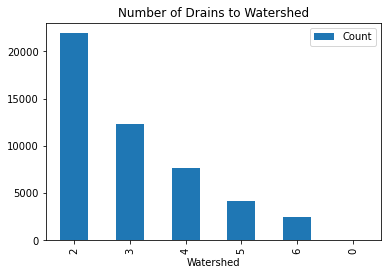

In [51]:
watershed_count.plot.bar(x = 'Watershed', y = 'Count', title ='Number of Drains to Watershed')

Here is a plot of the number of drains to watershed.

In [52]:
drain.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48463 entries, 0 to 48462
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    48463 non-null  int64   
 1   DRAIN       48463 non-null  int64   
 2   GISID       48462 non-null  object  
 3   EQPID       48462 non-null  object  
 4   SAPID       48463 non-null  object  
 5   FNODE_      48463 non-null  int64   
 6   TNODE_      48463 non-null  int64   
 7   CODE        48462 non-null  object  
 8   DIAMETER    48463 non-null  float64 
 9   WIDTH       48463 non-null  float64 
 10  HEIGHT      48463 non-null  float64 
 11  ACT_LENGTH  48463 non-null  float64 
 12  MATERIAL    48462 non-null  object  
 13  CONV_SHP    48462 non-null  object  
 14  FROM_ELEV   48463 non-null  float64 
 15  TO_ELEV     48463 non-null  float64 
 16  LINED       47159 non-null  object  
 17  SLOPE       48463 non-null  float64 
 18  ERA         2310 non-null   object  
 

In [58]:
Desired_columns = ['NAME', 'STATUS', 'WORK_ORDER', 'SLOPE', 'MATERIAL', 'WATERSHED']
drain[Desired_columns]

,NAME,STATUS,WORK_ORDER,SLOPE,MATERIAL,WATERSHED
0,None,A,None,0.0,RC,2
1,None,A,None,0.0,RCP,4
2,None,A,None,0.0,RCP,4
3,None,A,None,0.0,CMP,3
4,None,A,None,0.0,CMP,3
...,...,...,...,...,...,...
48458,SMYTHE CHANNEL,A,None,0.0,CONC,6
48459,SMYTHE CHANNEL,A,None,0.0,CONC,6
48460,SMYTHE CHANNEL,A,None,0.0,CONC,6
48461,SMYTHE CHANNEL,A,None,0.0,CONC,6


This is a dataframe with a subset of columns. There are 48,463 rows and 6 columns.

In [59]:
drain.head()

,OBJECTID,DRAIN,GISID,EQPID,SAPID,FNODE_,TNODE_,CODE,DIAMETER,WIDTH,...,STATUS,COMMENTS,OWNER,MAINT,ROUGHNESS,NAME,LOC_DESC,WATERSHED,SHAPE_Leng,geometry
0,1,47982,DC047982,88026638,SS-017808,7541,7542,X,0.0,36.0,...,A,None,S,6,0.0,None,FROM CLEANOUT TO CLEANOUT VIA BOX,2,56.419546,"LINESTRING (6295577.489 1910525.813, 6295572.1..."
1,2,43647,DC043647,88033125,SS-015380,25699,25672,D,12.0,0.0,...,A,None,S,6,0.0,None,FROM INLET TO INLET VIA PIPE,4,37.206045,"LINESTRING (6267767.764 1855281.133, 6267775.4..."
2,3,47983,DC047983,88032186,SS-015380,25699,25672,D,12.0,0.0,...,A,None,S,6,0.0,None,FROM INLET TO INLET VIA PIPE,4,36.858819,"LINESTRING (6267767.764 1855281.133, 6267766.6..."
3,4,47984,DC047984,88032187,SS-028157,26843,26844,D,8.0,0.0,...,A,None,S,6,0.0,None,FROM INLET TO CONNECT VIA PIPE,3,48.349789,"LINESTRING (6293886.072 1853481.927, 6293889.3..."
4,5,47985,DC047985,88027570,SS-028157,26843,26844,D,8.0,0.0,...,A,None,S,6,0.0,None,FROM INLET TO CONNECT VIA PIPE,3,48.034176,"LINESTRING (6293886.072 1853481.927, 6293884.9..."


In [61]:
drain_trimmed = drain[Desired_columns].copy()
drain_trimmed

,NAME,STATUS,WORK_ORDER,SLOPE,MATERIAL,WATERSHED
0,None,A,None,0.0,RC,2
1,None,A,None,0.0,RCP,4
2,None,A,None,0.0,RCP,4
3,None,A,None,0.0,CMP,3
4,None,A,None,0.0,CMP,3
...,...,...,...,...,...,...
48458,SMYTHE CHANNEL,A,None,0.0,CONC,6
48459,SMYTHE CHANNEL,A,None,0.0,CONC,6
48460,SMYTHE CHANNEL,A,None,0.0,CONC,6
48461,SMYTHE CHANNEL,A,None,0.0,CONC,6


Lastly, this is the cleaned and trimmed dataframe we can use to determine if any drains require maintenance, the slope of a drain and the watershed.

<AxesSubplot:>

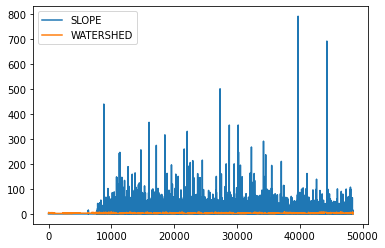

In [63]:
drain_trimmed.plot()

This is a graph of the trimmed data.